In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
print("Done")

Done


**Data Cleaning**
Getting an overview of the data and preparing to clean it. Will observe the data structure, look out for categorical data and check for validity of data (i.e: for negative values, potentially missing data, etc).

In [2]:
#if timeout occurs, save the dataset to input folder and run the following:
#url="../input/scooter_rental_data.csv"
url="https://aisgaiap.blob.core.windows.net/aiap6-assessment-data/scooter_rental_data.csv"
df = pd.read_csv(url)
df.drop_duplicates(inplace=True)
df.shape

(17379, 10)

In [4]:
df.head()
df.tail()

,date,hr,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
17369,2012-12-31,14,cloudy,70.1,93.2,45.0,15.0,12,432,2410
17370,2012-12-31,15,cloudy,70.1,95.0,45.0,9.0,48,481,3193
17371,2012-12-31,16,cloudy,68.4,91.4,48.0,13.0,9,211,2394
17372,2012-12-31,17,cloudy,68.4,95.0,48.0,6.0,8,98,1945
17373,2012-12-31,18,cloudy,68.4,93.2,48.0,9.0,38,70,1461
17374,2012-12-31,19,cloudy,68.4,91.4,60.0,11.0,11,75,1406
17375,2012-12-31,20,cloudy,68.4,91.4,60.0,11.0,40,58,1048
17376,2012-12-31,21,clear,68.4,91.4,60.0,11.0,28,47,1083
17377,2012-12-31,22,clear,68.4,93.2,56.0,9.0,34,91,625
17378,2012-12-31,23,clear,68.4,93.2,65.0,9.0,7,85,480


In [5]:
df.info()
#Need to convert date to DateTime and weather to Categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 10 columns):
date                      17379 non-null object
hr                        17379 non-null int64
weather                   17379 non-null object
temperature               17379 non-null float64
feels-like-temperature    17379 non-null float64
relative-humidity         17379 non-null float64
windspeed                 17379 non-null float64
psi                       17379 non-null int64
guest-users               17379 non-null int64
registered-users          17379 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 1.5+ MB


In [6]:
df.weather.unique()
#Some incorrectly labeled data that needs to be corrected.

array(['clear', 'cloudy', 'light snow/rain', 'loudy', 'lear', 'CLEAR',
       'CLOUDY', 'heavy snow/rain', 'LIGHT SNOW/RAIN'], dtype=object)

In [7]:
df.describe()
#There are negative values in guest-users/registered users column.

,hr,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,88.445624,117.322009,62.722884,12.736233,24.537488,249.739974,1999.216756
std,6.914405,16.290106,20.415345,19.292983,8.196891,14.457358,345.118505,1967.663842
min,0.000000,48.100000,60.800000,0.000000,0.000000,0.000000,-2.000000,-5.000000
25%,6.000000,75.200000,100.400000,48.000000,7.000000,12.000000,27.000000,442.500000
50%,12.000000,88.700000,118.400000,63.000000,13.000000,24.000000,117.000000,1500.000000
75%,18.000000,102.200000,134.600000,78.000000,17.000000,37.000000,338.000000,2859.000000
max,23.000000,131.000000,179.600000,100.000000,57.000000,49.000000,2567.000000,11519.000000


In [9]:
df.groupby(['date'])['hr'].count().value_counts()
#There are dates that do not contain all hourly data.
#Can do ffill later to fill up missing rows.

24    655
23     62
22      6
18      2
17      1
16      1
12      1
11      1
8       1
1       1
Name: hr, dtype: int64

In [10]:
df.isna().sum()
#no NA is good

date                      0
hr                        0
weather                   0
temperature               0
feels-like-temperature    0
relative-humidity         0
windspeed                 0
psi                       0
guest-users               0
registered-users          0
dtype: int64

**Cleaning Data**
Duplicated data had been dropped early in the beginning.
Following items need to be addressed.

**TODO:**
* Clean the weather data to lower case and fix spelling errors
* Convert weather to ordered categories
* Fix negative values in guest and registered users
* Create a new target variable 'total' = guests + registered_users
* Resample the data into Hourly, Daily and Monthly


In [11]:
WEATHERCOND = ['clear','cloudy','light snow/rain','heavy snow/rain']
def clean_weather_data(x):
  """returns weather data cleaned"""
  condition=x.strip().lower()
  if condition in WEATHERCOND:
    return condition
  elif condition == 'loudy':
    return 'cloudy'
  elif condition == 'lear':
    return 'clear'
  else:
    return np.NaN
  return condition

df.weather=df.weather.apply(clean_weather_data)
df.dropna(axis=0)
df.weather.unique()
df.weather=pd.Categorical(values=df.weather, categories=WEATHERCOND, ordered=True)

* Clean the weather data to lower case and fix spelling errors (done)
* Convert weather to ordered categories (done)

In [13]:
#How many rows have negative guests or registered users?
neg_selector=np.logical_or(df['guest-users']<0,df['registered-users']<0)
print("Rows with negative guests or users: {}".format(neg_selector.sum()))

#fill with 0 to retain weather information for rows with negative users
df.loc[df['guest-users']<0, 'guest-users'] = 0
df.loc[df['registered-users']<0, 'registered-users'] = 0
#Better code for next time: df[NUMERIC] = df[NUMERIC].clip(lower=0)

#calculate a new column as total users
df['total'] = df['guest-users']+df['registered-users']

Rows with negative guests or users: 0


We know that there are negative users in both users columns and we want to know how much.
Set those to 0 and also prepare a new column 'total' for total users.

Dataset will be resampled into hourly, daily and monthly data. Each dataset will give a different insight into the data.

In [14]:
#Sampling to Hourly and Forward Filling
dfhourly = df.copy()
dfhourly['datetime']=pd.to_datetime(dfhourly['date'].values + ' ' + dfhourly['hr'].astype('str').values + ':00:00')
dfhourly.set_index('datetime', inplace=True)
dfhourly.drop('date', inplace=True, axis=1)
dfhourly.drop('hr', inplace=True, axis=1) #need to recreate this later
dfhourly=dfhourly.resample('H').ffill()

#Recreating the hr column in addition to dayofweek, year and month
dfhourly.reset_index(inplace=True)
dfhourly['year']=dfhourly.datetime.dt.year
dfhourly['month']=dfhourly.datetime.dt.month
dfhourly['dayofweek']=dfhourly.datetime.dt.dayofweek
dfhourly['hr']=dfhourly.datetime.dt.hour
dfhourly.set_index('datetime', inplace=True)

#Able to select hourly data and be able to plot a continuous time series for that range
dfhourly['2011-01-01 00:00:00':'2011-02-01 23:00:00']


,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,total,year,month,dayofweek,hr
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,clear,66.7,95.0,81.0,0.0,3,21,164,185,2011,1,5,0
2011-01-01 01:00:00,clear,65.0,93.2,80.0,0.0,35,54,417,471,2011,1,5,1
2011-01-01 02:00:00,clear,65.0,93.2,80.0,0.0,38,35,356,391,2011,1,5,2
2011-01-01 03:00:00,clear,66.7,95.0,75.0,0.0,35,19,129,148,2011,1,5,3
2011-01-01 04:00:00,clear,66.7,95.0,75.0,0.0,11,0,10,10,2011,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-01 19:00:00,cloudy,66.7,89.6,81.0,9.0,26,19,1365,1384,2011,2,1,19
2011-02-01 20:00:00,cloudy,65.0,87.8,87.0,9.0,30,36,902,938,2011,2,1,20
2011-02-01 21:00:00,cloudy,65.0,87.8,87.0,9.0,44,0,835,835,2011,2,1,21


In [15]:
#Downsampling the data to Daily level
dfdaily = df.copy()
dfdaily['date'] = pd.to_datetime(dfdaily['date'])
dfdaily.set_index('date', inplace=True)
dfdaily.drop('hr', axis=1, inplace=True)
colnames=dfdaily.columns
TARGET = ['guest-users','registered-users', 'total']
FEATURES = [c for c in dfdaily.columns if (c not in TARGET and c!='weather')]
upsampled_features = dfdaily[FEATURES].resample('D').mean()
upsampled_weather = dfdaily['weather'].resample('D').apply(lambda x: stats.mode(x)[0][0])
upsampled_target = dfdaily[TARGET].resample('D').sum()
dfdaily = pd.concat([upsampled_weather,upsampled_features,upsampled_target], sort=True, axis=1)
dfdaily.columns = colnames

#add in the month and year after resampling
dfdaily.reset_index(inplace=True)
dfdaily['year']=dfdaily.date.dt.year
dfdaily['month']=dfdaily.date.dt.month
dfdaily['dayofweek']=dfdaily.date.dt.dayofweek
dfdaily.set_index('date', inplace=True)

dfdaily.head()

,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,total,year,month,dayofweek
date,,,,,,,,,,,,
2011-01-01,clear,75.500000,104.000000,80.583333,10.750000,25.208333,2315,8490,10805,2011,1,5
2011-01-02,cloudy,77.156522,102.826087,69.608696,16.652174,27.391304,919,8730,9649,2011,1,6
2011-01-03,clear,62.990909,83.300000,43.727273,16.636364,24.818182,842,15995,16837,2011,1,0
2011-01-04,clear,63.313043,86.000000,59.043478,10.739130,25.173913,770,18910,19680,2011,1,1
2011-01-05,clear,65.591304,88.034783,43.695652,12.521739,22.521739,581,19765,20346,2011,1,2


In [16]:
#Downsampling the data to Monthly level
dfmthly = df.copy()
dfmthly['date'] = pd.to_datetime(dfmthly['date'])
dfmthly.set_index('date', inplace=True)
dfmthly.drop('hr', axis=1, inplace=True)
colnames=dfmthly.columns
TARGET = ['guest-users','registered-users', 'total']
FEATURES = [c for c in dfmthly.columns if (c not in TARGET and c!='weather')]
upsampled_features = dfmthly[FEATURES].resample('M').mean()
upsampled_weather = dfmthly['weather'].resample('M').apply(lambda x: stats.mode(x)[0][0])
upsampled_target = dfmthly[TARGET].resample('M').sum()
dfmthly = pd.concat([upsampled_weather,upsampled_features,upsampled_target], sort=True, axis=1)
dfmthly.columns = colnames

#add in the month and year after resampling
dfmthly.reset_index(inplace=True)
dfmthly['year']=dfmthly.date.dt.year
dfmthly['month']=dfmthly.date.dt.month
dfmthly.set_index('date', inplace=True)

dfmthly.head()

,weather,temperature,feels-like-temperature,relative-humidity,windspeed,psi,guest-users,registered-users,total,year,month
date,,,,,,,,,,,
2011-01-31,clear,63.090116,85.005814,57.405523,13.231105,24.184593,21622,456606,478228,2011,1
2011-02-28,clear,70.423421,94.744838,55.970724,15.372881,25.394453,43808,545804,589612,2011,2
2011-03-31,clear,74.425479,99.396438,57.005479,15.558904,24.568493,89845,665843,755688,2011,3
2011-04-30,clear,86.249374,115.047844,66.821975,16.354659,24.605007,156527,942797,1099324,2011,4
2011-05-31,clear,95.237903,126.236290,71.336022,12.145161,25.338710,217418,1362051,1579469,2011,5


There are now 3 different datasets to work with, namely* dfhourly, dfdaily and dfmonthly* which are resamples of the original dataset.

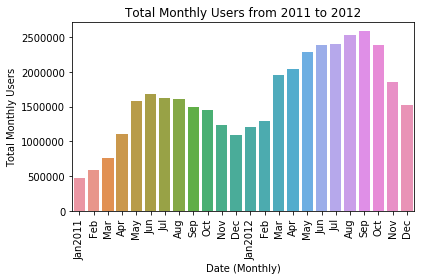

In [21]:
def line_format(label):
  """Returns a shortened label for ticks"""
  month = label.month_name()[:3]
  if month == 'Jan':
    month += f'{label.year}'
  return month

#Plot TimeSeries (Monthly) Against Total Users
ax = sns.barplot(data=dfmthly.reset_index(), x='date',y='total')
ax.set_xticklabels(map(lambda x: line_format(x), dfmthly.index))
plt.ylabel("Total Monthly Users")
plt.xlabel("Date (Monthly)")
plt.xticks(rotation=90)
plt.title("Total Monthly Users from 2011 to 2012")
plt.tight_layout()
plt.show()

We can get an idea of how e-scooter rental is like from the monthly plot and a seasonal trend can be observed.
Usage totals peaks during the mid of the year and dips at the start/end of year.
Additionally, there's an increase in number of users from 2011 to 2012. If user growth continues then for subsequent years there will be higher number of users as well.

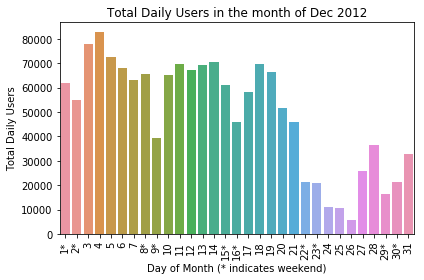

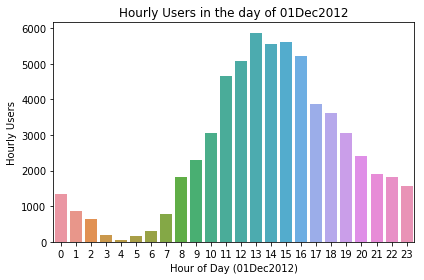

In [31]:
def day_format(label):
  """Returns a shortened label for ticks (day)"""
  return "{}{}".format(label.day, ("*" if label.dayofweek >= 5 else ""))

#Daily usage in a month
df_dec2012 = dfdaily['2012-12']
ax = sns.barplot(data=df_dec2012.reset_index(), x='date',y='total')
ax.set_xticklabels(map(lambda x: day_format(x), df_dec2012.index))
plt.xticks(rotation=90)
plt.ylabel("Total Daily Users")
plt.xlabel("Day of Month (* indicates weekend)")
plt.title("Total Daily Users in the month of Dec 2012")
plt.tight_layout()
plt.show()

#Hourly usage in a day
_=sns.barplot(x='hr', y='total', data=dfhourly['2012-12-01'].reset_index())
plt.ylabel("Hourly Users")
plt.xlabel("Hour of Day (01Dec2012)")
plt.title("Hourly Users in the day of 01Dec2012")
plt.tight_layout()
plt.show()

We zoom in on the data and examine the usage within the month of December 2012, it can be seen that week of day does play some part in the scooter usage (slightly lesser use on a weekend). However, seasonalities such as the days leading up to Christmas can throw the use of using dayofweek as a feature off course (i.e: is a weekday but lesser users).

Next, visualising the usage within the day of 01Dec2012 shows how time of day affects the number of users as well. People do use the rental service even in the wee hours of the early morning!

These are how some time features (derived from the date column) influence the target variable. To see how the other features interact with the target, we will use correlation and visualise this interaction.

total                     1.000000
registered-users          0.990572
guest-users               0.622516
hr                        0.391120
temperature               0.382873
feels-like-temperature    0.379617
year                      0.255047
month                     0.125854
windspeed                 0.078865
psi                      -0.005964
dayofweek                -0.035443
relative-humidity        -0.308281
Name: total, dtype: float64


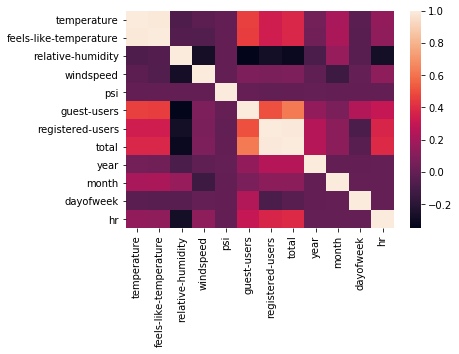

In [34]:
#Correlation with hourly data
print(dfhourly.corr()['total'].sort_values(ascending=False))
_=sns.heatmap(dfhourly.corr())
plt.show()

The correlation rankings confirms that the hour of day has interaction with our target variable. The feature 'dayofweek' is observed in the lower rankings and this could be due to other potential factors (perhaps seasonality as previously discussed).

One way to overcome this is to acquire a new boolean feature is_holiday and concat to the dataset. is_holiday can also be combined with is_weekend to see if the combined feature has a better correlation with the target variables.

We also see that temperature has a comparatively high correlation with the total users.

total                     1.000000
registered-users          0.980774
feels-like-temperature    0.603523
temperature               0.599727
year                      0.585733
guest-users               0.566947
month                     0.289291
psi                       0.016378
dayofweek                -0.080683
relative-humidity        -0.098083
windspeed                -0.230659
Name: total, dtype: float64


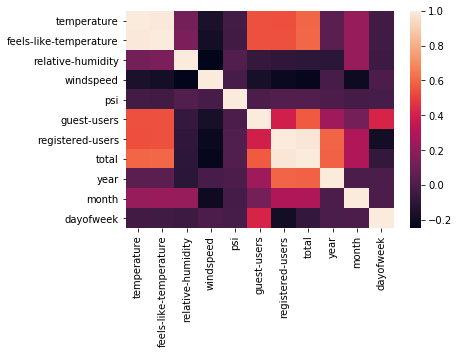

total                     1.000000
registered-users          0.996886
guest-users               0.900626
feels-like-temperature    0.701884
temperature               0.696531
year                      0.684135
month                     0.351582
relative-humidity         0.088797
psi                      -0.087374
windspeed                -0.485768
Name: total, dtype: float64


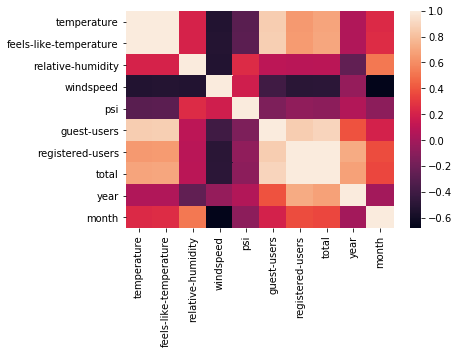

In [41]:
#Comparing with daily and monthly aggregates
print(dfdaily.corr()['total'].sort_values(ascending=False))
_=sns.heatmap(dfdaily.corr())
plt.show()

print(dfmthly.corr()['total'].sort_values(ascending=False))
_=sns.heatmap(dfmthly.corr())
plt.show()

Having examined the overview of usage in a year/month/day and the correlation table for hourly data, we check the correlation of the downsampled datasets (stripped of the hour-of-day). In the downsampled data, there is now a higher emphasis on temperature, year and month as potentially important features (huge jump in correlation).

Next, we expand on the observations with more visualisations on the by-day dataset.

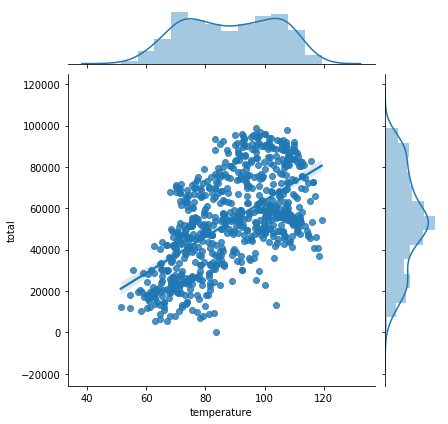

In [36]:
#Joint Plot of Daily Temperature vs Total Usage
_=sns.jointplot(data=dfdaily, x='temperature', y='total',kind='reg')
plt.show()


(Due to hourly data having too many points, it is difficult to visualise in a scatter plot, hence, the daily dataset will be used).

The above joint plot gives an insight to the mentioned correlation between temperature and rental of e-scooters as well as the distribution stats for the number of users and overall temperature of the locality. When it's too cold, the rental rates drop. Surprisingly the number of users doesn't decline when the temperature becomes too hot.

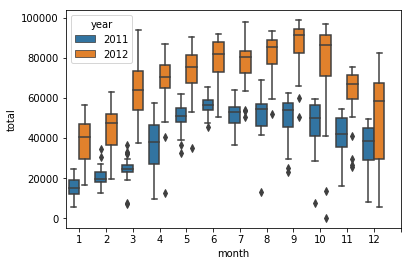

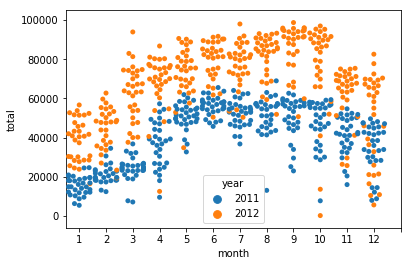

In [37]:
_=sns.boxplot(data=dfdaily, x='month', y='total', hue='year')
plt.xticks(range(0,13))
plt.show()

_=sns.swarmplot(data=dfdaily, x='month', y='total', hue='year')
plt.xticks(range(0,13))
plt.show()

The next highest correlation would be the month and year. To visualise the effect of these variables on the e-scooter usage (due to rising popularity in the upcoming years this will impact how we choose to create the data model), it can be seen that year 2012 has higher usage in comparison to 2011. (Hypothesis testing can be performed later to check for significance).

Another observation is that the box plot shows less variance in monthly usage in 2011 (shorter box plots), likely due to a dedicated pool of users renting the e-scooters. 2012 sees a higher variance and higher usage, likely due to increase in popularity of the service and perhaps intermittent behaviors from the users of the service.

In [38]:
#There is a higher deviation observed in 2012. Let's confirm this.
dfdaily.groupby(['year']).std()['total']
#dfdaily.groupby(['year','month']).std()['total']

year
2011    15734.462429
2012    20619.798707
Name: total, dtype: float64

**How about weather conditions on the rental service?**

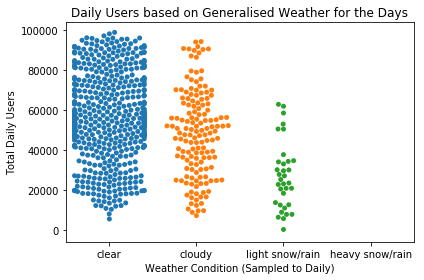

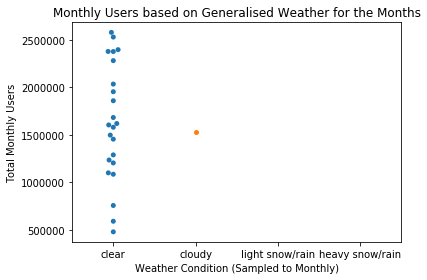

In [39]:
_=sns.swarmplot(x='weather', y='total', order=WEATHERCOND, data=dfdaily)
plt.ylabel("Total Daily Users")
plt.xlabel("Weather Condition (Sampled to Daily)")
plt.title("Daily Users based on Generalised Weather for the Days")
plt.tight_layout()
plt.show()
_=sns.swarmplot(x='weather', y='total', order=WEATHERCOND, data=dfmthly)
plt.ylabel("Total Monthly Users")
plt.xlabel("Weather Condition (Sampled to Monthly)")
plt.title("Monthly Users based on Generalised Weather for the Months")
plt.tight_layout()
plt.show()

After downsampling the data to Daily and Monthly using the **highest occurring weather** to describe the general weather for that day/month, it can be observed that there is information lost as the harsher weather conditions don't happen as frequently within the day/month.

There are more data points in 'clear' condition signalling the weather of where the data was sampled from. At the same time more points are higher on the diagram indicating more users during clearer weather conditions.

More data points here for 'clear' weather doesn't mean that there are more users renting the e-scooter on clearer weathers, it just shows that generally the weather in the locality is 'clear'. More users can be seen by the upper limits of the blue dots as compared to the orange and green dots of 'cloud' and 'light snow/rain' weathers.

**Conclusion**
* Data Cleaning
* Data cleaning had been performed to correct weather labels and zero-ise negative users.
New data columns such as dayofweek, month and year added to get additional features for predicting the number of users.
Data had been resampled into Hourly (with forward filling), Daily and Monthly sets (by taking mean of features, mode for weather conditions and sum for target variables).

* Data Exploration
* Time series plot for monthly usage shows seasonal usage and increase in usage over 2011-2012.
Heatmaps and Correlation tables indicate the more important features which are further visualised in relevant plots.
Finally, insight into weather conditions (categorical data not taken into consideration in correlation) affecting usage.